# RTX 2080 Ti Benchmarks - September 04 2019

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np

In [4]:
def plot2dRank(df, arch):
    fig = plt.figure(figsize=(8, 5), dpi=128)
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Execution Times of Convolution Layers - ' + arch, fontsize=12)
    ax.set_ylabel(r'Execution Time ($\mu$s)')
    ax.set_facecolor('0.97')
    color = [   (0.462745098, 0.7254901961, 0),    # cuDNN
                (1, 0, 0),   # Rank 1
                (1, 0.2, 0), # Rank 2
                (1, 0.4, 0), # Rank 4
                (1, 0.6, 0), # Rank 8
                (1, 0.8, 0), # Rank 16
            ]

    df.set_index(["N C H W pad T Y X"]).plot.bar(ax=ax, color=color)
    plt.xticks(np.arange(5) , ["Layer 1", "Layer 2", "Layer 3", "Layer 4", "Layer 5"])
    ax.set_xlabel(arch + " Layers")
    plt.xticks(rotation=30)
    tikzplotlib.save(arch+'_plot.tex')
    df.to_latex(arch+'_table.tex')
    plt.savefig(arch+'_plot.png')

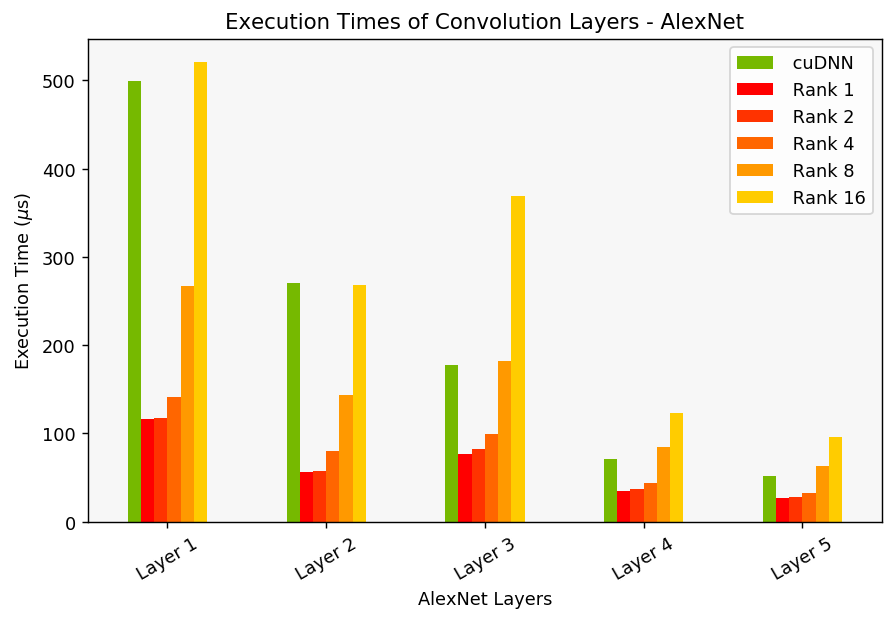

In [5]:
desc = "2080ti_190904a"
arch = "AlexNet"
    
df = pd.read_csv("BothConv2dForward_results_"+desc+"_"+arch+".txt")
plot2dRank(df, arch)